# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [245]:
# importação dos módulos

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
import pdfplumber
import re

In [246]:
with pdfplumber.open("SISNAC.pdf") as pdf:
    first_page = pdf.pages[0]
    texto_pdf = first_page.extract_text()


In [247]:
# leitura do arquivo csv com pandas

dados = pd.read_csv('b1abb33c4f.csv')

In [248]:
# transformação do csv em DataFrame

df = pd.DataFrame(dados)

In [249]:
# visualização do DF

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [250]:
# conversão dos títulos em minúsculo (desnecessário aqui, mas melhor para manipular)

df.columns = df.columns.str.lower()

In [251]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['origem', 'codestab', 'codmunnasc', 'locnasc', 'idademae', 'estcivmae',
       'escmae', 'codocupmae', 'qtdfilvivo', 'qtdfilmort', 'codmunres',
       'gestacao', 'gravidez', 'parto', 'consultas', 'dtnasc', 'horanasc',
       'sexo', 'apgar1', 'apgar5', 'racacor', 'peso', 'idanomal', 'dtcadastro',
       'codanomal', 'numerolote', 'versaosist', 'dtrecebim', 'difdata',
       'dtrecoriga', 'naturalmae', 'codmunnatu', 'codufnatu', 'escmae2010',
       'seriescmae', 'dtnascmae', 'racacormae', 'qtdgestant', 'qtdpartnor',
       'qtdpartces', 'idadepai', 'dtultmenst', 'semagestac', 'tpmetestim',
       'consprenat', 'mesprenat', 'tpapresent', 'sttrabpart', 'stcesparto',
       'tpnascassi', 'tpfuncresp', 'tpdocresp', 'dtdeclarac', 'escmaeagr1',
       'stdnepidem', 'stdnnova', 'codpaisres', 'tprobson', 'paridade',
       'kotelchuck', 'contador', 'munresstatus', 'munrestipo', 'munresnome',
       'munresuf', 'munreslat', 'munreslon', 'munre

In [252]:
df['contador'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27028 entries, 0 to 27027
Series name: contador
Non-Null Count  Dtype
--------------  -----
27028 non-null  int64
dtypes: int64(1)
memory usage: 211.3 KB


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

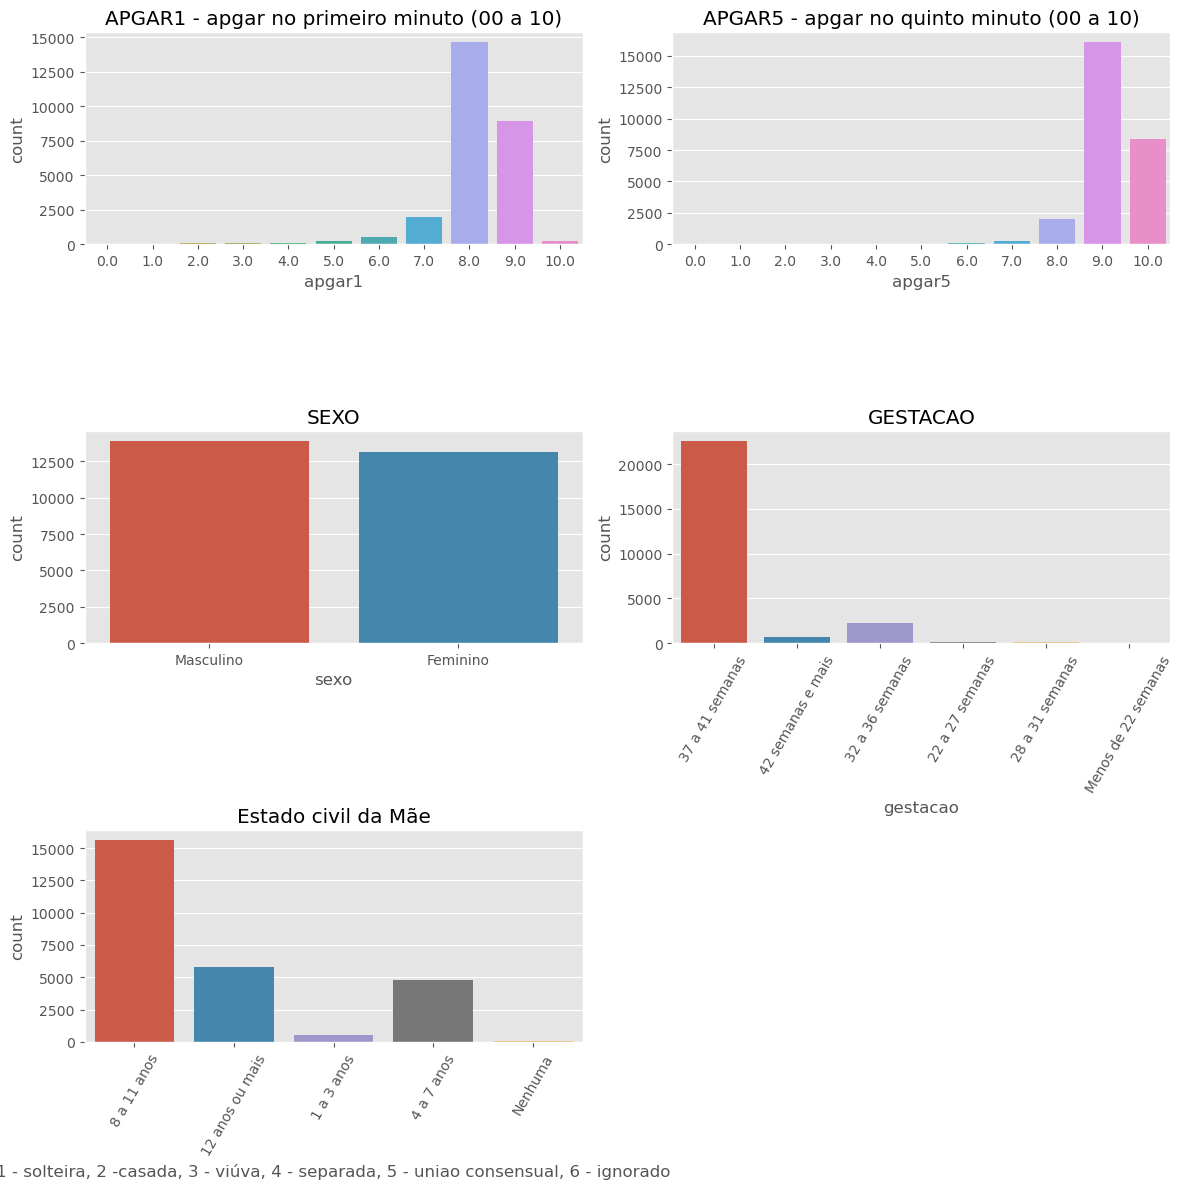

In [253]:
# tamanho do gráfico - painel com vários
plt.figure(figsize=(12, 12))

# plotagem do primeiro
plt.subplot(3, 2, 1) # indicação de qual deles será 
sns.countplot(data=df, x='apgar1')
plt.title('APGAR1 - apgar no primeiro minuto (00 a 10)')

# plotagem do segundo
plt.subplot(3, 2, 2) # indicação de qual deles será 
sns.countplot(data=df, x='apgar5')
plt.title('APGAR5 - apgar no quinto minuto (00 a 10)')

# plotagem do terceiro
plt.subplot(3, 2, 3) # indicação de qual deles será 
sns.countplot(data=df, x='sexo')
plt.title('SEXO')

# plotagem do quarto
plt.subplot(3, 2, 4) # indicação de qual deles será 
sns.countplot(data=df, x='gestacao')
plt.xticks(rotation=60) # ajuste no rótulo do eixo x
plt.title('GESTACAO')

# plotagem do quinto
plt.subplot(3, 2, 5) # indicação de qual deles será 
sns.countplot(data=df, x='escmae')
plt.xlabel('1 - solteira, 2 -casada, 3 - viúva, 4 - separada, 5 - uniao consensual, 6 - ignorado')
plt.title('Estado civil da Mãe')
plt.xticks(rotation=60) # ajuste no rótulo do eixo x

# exibição do gráfico
plt.tight_layout() # ajuste automático
plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

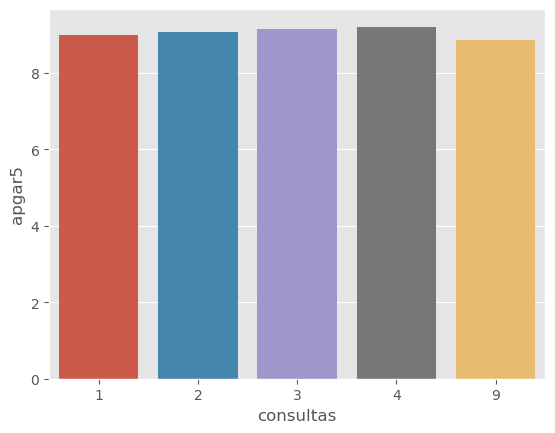

In [254]:
# cálculo do APGAR5 médio por CONSULTAS

apgar5_medio_por_consultas = df.groupby('consultas')['apgar5'].mean().reset_index()

# criação do gráfico de barras
sns.barplot(data=apgar5_medio_por_consultas, x='consultas', y='apgar5')

# exibição do gráfico
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

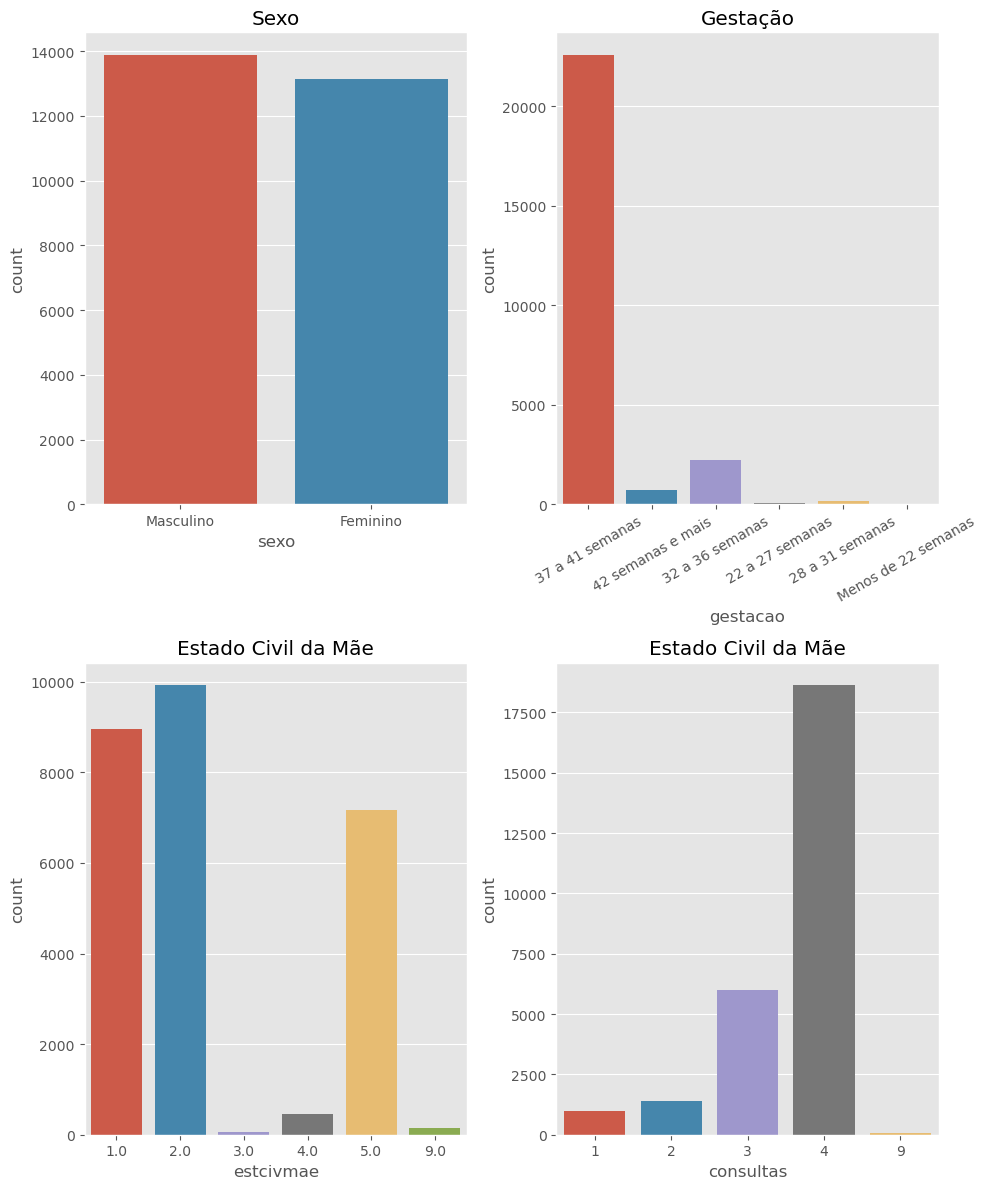

In [255]:
plt.close('all')

plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
sns.countplot(data=df, x='sexo')
plt.title('Sexo')

plt.subplot(2,2,2)
sns.countplot(data=df, x='gestacao')
plt.title('Gestação')
plt.xticks(rotation=30) # ajuste no rótulo do eixo x

plt.subplot(2,2,3)
sns.countplot(data=df, x='estcivmae')
plt.title('Estado Civil da Mãe')

plt.subplot(2,2,4)
sns.countplot(data=df, x='consultas')
plt.title('Estado Civil da Mãe')

plt.tight_layout() # ajuste automático
plt.show()